<a href="https://colab.research.google.com/github/AswinkumarGitHub/ML/blob/main/Iris_Dataset_ASWIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=load_iris()
data=pd.DataFrame(dataset['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [ ]:
data['Species']=dataset['target']

In [ ]:
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

In [ ]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

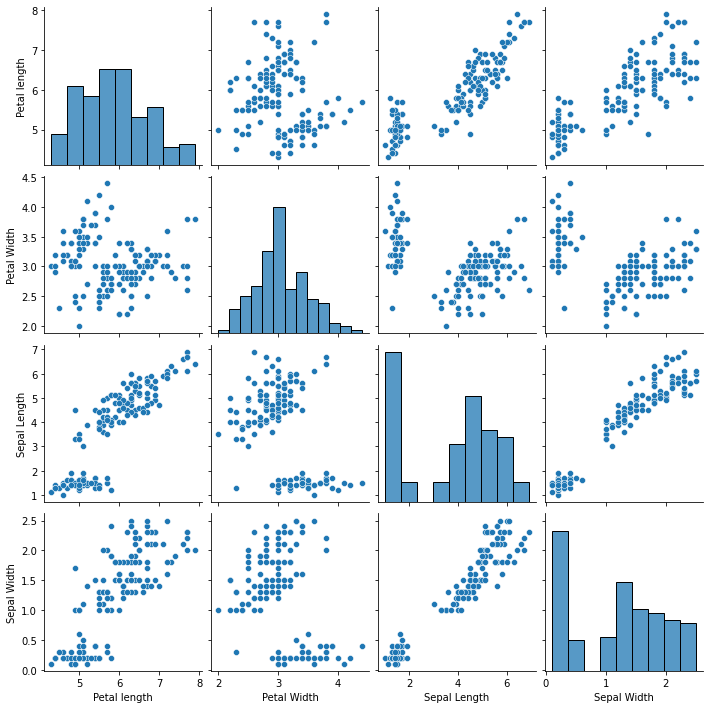

In [ ]:
sns.pairplot(data)
plt.show()

[]

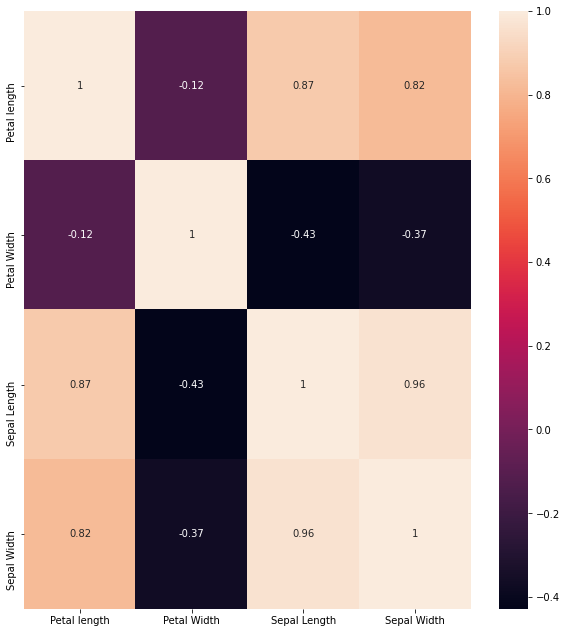

In [ ]:

plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

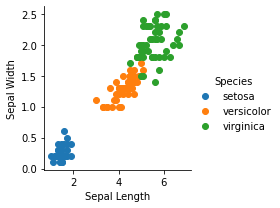

In [ ]:
sns.FacetGrid(data,hue="Species")\
.map(plt.scatter,"Sepal Length","Sepal Width")\
.add_legend()
plt.show()

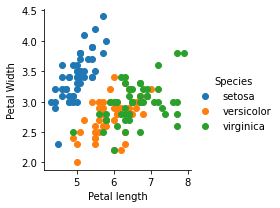

In [ ]:
sns.FacetGrid(data,hue="Species")\
.map(plt.scatter,"Petal length","Petal Width")\
.add_legend()
plt.show()

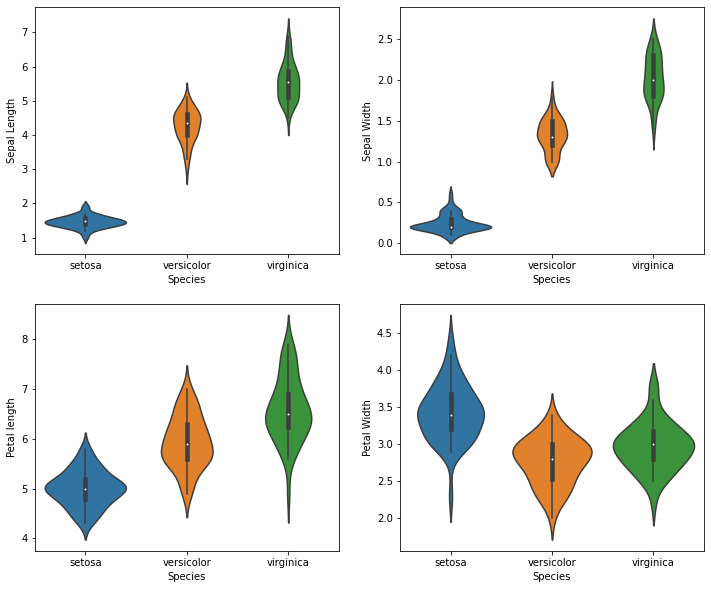

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="Petal Width",data=data)

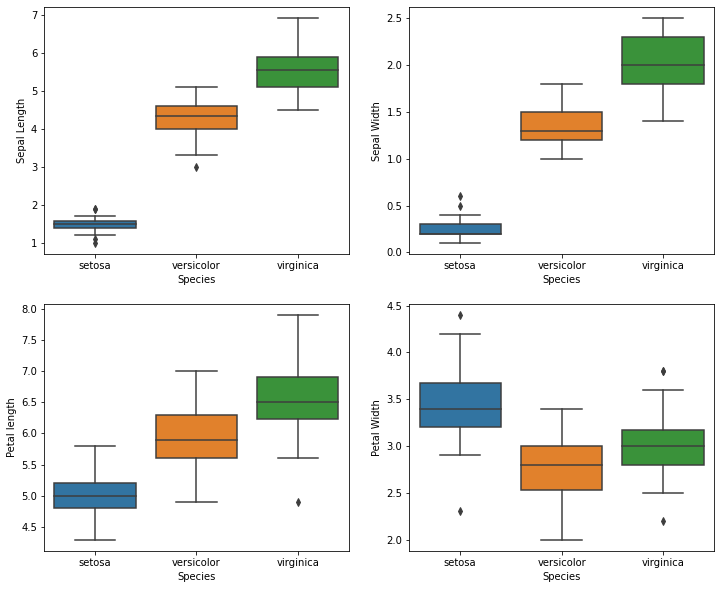

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train,test=train_test_split(data,test_size=0.3)

In [ ]:
train.shape, test.shape

((105, 5), (45, 5))

In [ ]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [ ]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

In [ ]:
svmmodel=svm.SVC()
svmmodel.fit(train_X,train_y)
svmprediction=svmmodel.predict(test_X)
svmaccuracy=metrics.accuracy_score(svmprediction,test_y)
print("SVM model accuracy is {}".format(svmaccuracy))

SVM model accuracy is 0.9777777777777777


In [ ]:
lrmodel=LogisticRegression()
lrmodel.fit(train_X,train_y)
lrprediction=lrmodel.predict(test_X)
lraccuracy=metrics.accuracy_score(lrprediction,test_y)
print("Logistic Regression Model Accuracy is {} ".format(lraccuracy))

Logistic Regression Model Accuracy is 0.9777777777777777 


In [ ]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(train_X,train_y)
dtpredict=dtmodel.predict(test_X)
dtaccuracy=metrics.accuracy_score(dtpredict,test_y)
print("Decission Tree Model Accuracy is {}".format(dtaccuracy*100))

Decission Tree Model Accuracy is 95.55555555555556


In [ ]:
test_preddf=test.copy()
test_preddf['Predicted Species']=dtpredict
wrongpred=test_preddf.loc[test['Species'] != dtpredict]
wrongpred

,Petal length,Petal Width,Sepal Length,Sepal Width,Species,Predicted Species
57,4.9,2.4,3.3,1.0,versicolor,virginica
70,5.9,3.2,4.8,1.8,versicolor,virginica
